In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
data = pd.read_csv(r'C:\Users\ATHARVA\Documents\coding practice\DMG Bonus\Bonus-assigment-3\zomatoData.csv',sep=",")

In [172]:
data.head()

,Name,Address,Phone,Rating,AvgCost,Known For,Popular Dishes,Cuisine,Reviews,Location
0,Pizza Hut,"17 & 18, Corner Market, Malviya Nagar, New Delhi",918929647587,3.7,800,Casual Seating Area|Prompt Service|Reasonable ...,NaN,Pizza|Fast Food|Pasta|Beverages|Desserts|,Dining|Delivery|Casual Seating Area|Prompt Ser...,South Delhi
1,RollsKing,"Shop 2, 10/127, Malviya Nagar, New Delhi",919560101636,3.9,300,Pocket Friendly|Tasty|Contactless Delivery|Bes...,NaN,Rolls|Fast Food|North Indian|Beverages|,Dining|Delivery|Pocket Friendly|Tasty|Contactl...,South Delhi
2,Punjabi Angithi,"84, Ground Floor, Left Corner, Behind Hero Sho...",911149952492,4.0,200,Fast Delivery Service|Cute Packaging|Food Pres...,Chilly Momo|Veg Noodles|Dal|Momos|,North Indian|Chinese|Rolls|Momos|Street Food|P...,Chilly Momo|Veg Noodles|Dal|Momos|Fast Deliver...,South Delhi
3,Chicago Pizza,"8-A, Hauz Khas Village, New Delhi",919540937301,3.7,700,Comforting Atmosphere|Spill Proof Packaging|Fr...,Paneer Delight Pizza|Chicago Pizza|Pizzas|Drink|,Pizza|Fast Food|,Dining|Delivery|Paneer Delight Pizza|Chicago P...,South Delhi
4,BOX8 - Desi Meals,"F5, Ground Floor, Gautam Nagar, Gulmohar Park ...",918068172526,4.3,250,Customizable Food|Good Taste|Elaborate Menu|Fr...,NaN,North Indian|Biryani|Desserts|,Customizable Food|Good Taste|Elaborate Menu|Fr...,South Delhi


In [173]:
# from sklearn.preprocessing import MinMaxScaler

# data['AvgCost'] = MinMaxScaler().fit_transform(data['AvgCost'].values.reshape(-1,1))
# data['Rating'] = MinMaxScaler().fit_transform(data['Rating'].values.reshape(-1,1))

<AxesSubplot:xlabel='Rating', ylabel='AvgCost'>

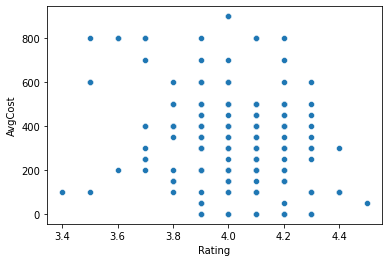

In [174]:
import seaborn as sns
sns.scatterplot(x="Rating",y="AvgCost",data=data)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            201 non-null    object 
 1   Address         201 non-null    object 
 2   Phone           201 non-null    int64  
 3   Rating          201 non-null    float64
 4   AvgCost         201 non-null    int64  
 5   Known For       161 non-null    object 
 6   Popular Dishes  107 non-null    object 
 7   Cuisine         175 non-null    object 
 8   Reviews         178 non-null    object 
 9   Location        201 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [176]:
data2 = data.drop(['Name','Address','Phone','Known For','Cuisine','Reviews','Popular Dishes','Location'],axis=1)

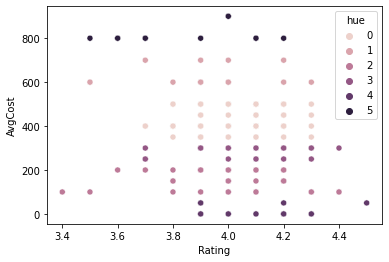

In [177]:
from sklearn.cluster import AgglomerativeClustering

hr = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
hr.fit_predict(data2)

hr.labels_
data2['hue'] = hr.labels_

sns.scatterplot(x="Rating",y="AvgCost",hue="hue",data=data2)
plt.show()

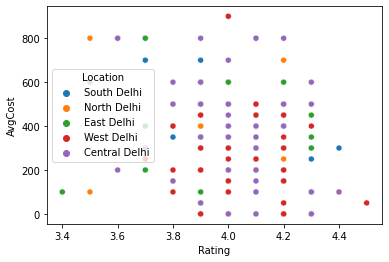

In [178]:
sns.scatterplot(x="Rating",y="AvgCost",hue="Location",data=data)
plt.show()

In [179]:
data['Reviews'] = data['Reviews'].fillna('')

list_of_reviews = data['Reviews'].tolist()
sample_review = []

for i in range(len(list_of_reviews)):
    if list_of_reviews[i] != np.nan:
        sample_review.append(list_of_reviews[i].split('|'))
        
for i in range(len(sample_review)):
    for j in range(len(sample_review[i])):
        sample_review[i][j] = sample_review[i][j].strip()
    


In [180]:
data['Cuisine'] = data['Cuisine'].fillna('')

list_of_cuisines = data['Cuisine'].tolist()
sample_cuisine = []

for i in range(len(list_of_cuisines)):
    if list_of_cuisines[i] != np.nan:
        sample_cuisine.append(list_of_cuisines[i].split('|'))
        
for i in range(len(sample_cuisine)):
    for j in range(len(sample_cuisine[i])):
        sample_cuisine[i][j] = sample_cuisine[i][j].strip()

In [181]:
dict = {}

for i in range(len(sample_cuisine)) : 
    for j in range(len(sample_cuisine[i])) : 
        if sample_cuisine[i][j] in dict : 
            dict[sample_cuisine[i][j]] += 1
        else : 
            dict[sample_cuisine[i][j]] = 1
            
print(dict)

{'Pizza': 24, 'Fast Food': 86, 'Pasta': 9, 'Beverages': 66, 'Desserts': 46, '': 201, 'Rolls': 23, 'North Indian': 91, 'Chinese': 56, 'Momos': 20, 'Street Food': 46, 'Biryani': 29, 'South Indian': 34, 'Mithai': 13, 'Wraps': 7, 'Burger': 30, 'Bakery': 8, 'Tea': 1, 'Sandwich': 14, 'Mughlai': 24, 'Kebab': 14, 'Hyderabadi': 12, 'Healthy Food': 5, 'Salad': 5, 'Coffee': 9, 'Lucknowi': 3, 'Sichuan': 1, 'Continental': 4, 'American': 2, 'Tibetan': 1, 'Maharashtrian': 3, 'Andhra': 6, 'Cafe': 4, 'Asian': 2, 'Shake': 4, 'Italian': 2, 'Seafood': 2, 'Kerala': 2, 'Ice Cream': 3, 'Mexican': 1, 'Juices': 1}


In [182]:
dict_reviews = {}

for i in range(len(sample_review)) : 
    for j in range(len(sample_review[i])) : 
        if sample_review[i][j] in dict_reviews : 
            dict_reviews[sample_review[i][j]] += 1
        else : 
            dict_reviews[sample_review[i][j]] = 1
            
print(dict_reviews)

{'Dining': 135, 'Delivery': 135, 'Casual Seating Area': 8, 'Prompt Service': 13, 'Reasonable Prices': 8, 'Ambiance': 4, 'Quality': 8, 'Good Food': 10, '': 201, 'Pocket Friendly': 15, 'Tasty': 6, 'Contactless Delivery': 8, 'Best Place': 1, 'Staff': 6, 'Prices': 8, 'Chilly Momo': 1, 'Veg Noodles': 1, 'Dal': 2, 'Momos': 1, 'Fast Delivery Service': 6, 'Cute Packaging': 4, 'Food Presentation': 11, 'Food Taste': 5, 'Worth the Money': 10, 'Paneer Delight Pizza': 1, 'Chicago Pizza': 1, 'Pizzas': 5, 'Drink': 1, 'Comforting Atmosphere': 5, 'Spill Proof Packaging': 4, 'Friendly Staff': 1, 'Excellent Service': 3, 'Owner': 3, 'Perfect Presentation': 3, 'Customizable Food': 9, 'Good Taste': 15, 'Elaborate Menu': 13, 'Fresh Food': 9, 'Good Quality': 8, 'Quantity': 12, 'Aloo Jeera': 1, 'Deluxe Thali': 6, 'Chole': 4, 'Malai Chaap': 1, 'Raita': 6, 'Rice': 1, 'Drive through': 10, 'Nice Crowd': 3, 'Low Price': 10, 'Great Recommendations': 13, 'Polite Staff': 14, 'Fast Delivery': 4, 'Kachori': 2, 'Samosa':

In [183]:
for i in dict.keys() : 
    data[i] = np.zeros(len(data))
    
for i in range(len(sample_cuisine)) :
    for j in range(len(sample_cuisine[i])) : 
        data.loc[i,sample_cuisine[i][j]] = 1

In [184]:
data['Rolls'].value_counts()

0.0    178
1.0     23
Name: Rolls, dtype: int64

In [185]:
data['cuisine_tag_count'] = np.zeros(len(data))

for i in range(len(sample_cuisine)) : 
    for col in dict.keys() : 
        if data[col].iloc[i] == 1 : 
            data.loc[i,'cuisine_tag_count'] += 1
            
data['cuisine_tag_count'].value_counts()

4.0    38
6.0    33
5.0    30
3.0    26
1.0    26
7.0    25
8.0     9
2.0     9
9.0     5
Name: cuisine_tag_count, dtype: int64

In [186]:
# data['review_tag_count'] = np.zeros(len(data))

# for i in range(len(sample_review)) : 
#     for col in dict_reviews.keys() : 
#         if data[col].iloc[i] == 1 : 
#             data.loc[i,'review_tag_count'] += 1
            
# data['review_tag_count'].value_counts()

data['good service'] = np.zeros(len(data))

check_list = ['service','Service','staff','Staff','friend']

for i in range(len(sample_review)) : 
    for j in range(len(sample_review[i])) : 
        for k in range(len(check_list)) : 
            if sample_review[i][j].find(check_list[k]) != -1: 
                print(sample_review[i][j])
                data.loc[i,'good service'] = 1
            
data['good service'].value_counts()

Prompt Service
Staff
Fast Delivery Service
Friendly Staff
Excellent Service
Polite Staff
Excellent Service
Courteous Staff
Good Service
Prompt Service
Fast Service
Awesome Service
Timely Service
Staff Behaviour
Staff Behaviour
Customer Service
Staff
Polite Staff
Staff
Courteous Staff
Fast Delivery Service
Best Services
Courteous Staff
Service is Great
Prompt Service
Service is Great and Fast
Fast Service
Polite Staff
Cordial Staff
Quick Service
Timely Service
Polite Staff
Good Service
Self Service
Polite Staff
Super Service
Fast Delivery Service
Best Services
Staff
Good Service
Good Service
Excellent Service
Good Service
Cordial Staff
Prompt Service
Best Staff
Polite Staff
Delivery Services
Prompt Service
Good Service
Prompt Service
Friendly Staffs
Good Service
Staff Behaviour
Great Staff
Good Service
Polite Staff
Timely Service
Timely Service
Courteous Staff
Service
Polite Staff
Good Quality Good Service
Self Service
Prompt Service
Good Service
Fast Delivery Service
Amazing Service
Pr

0.0    119
1.0     82
Name: good service, dtype: int64

In [187]:
data['Dine-in'] = np.zeros(len(data))

check_list = ['Dining','dining','ambiance','staff','Staff','Ambiance']

for i in range(len(sample_review)) : 
    for j in range(len(sample_review[i])) : 
        if sample_review[i][j].find(check_list[k]) != -1 : 
            print(sample_review[i][j])
            data.loc[i,'Dine-in'] = 1
            
data['Dine-in'].value_counts()

Staff
Friendly Staff
Polite Staff
Courteous Staff
Staff Behaviour
Staff Behaviour
Staff
Polite Staff
Staff
Courteous Staff
Courteous Staff
Polite Staff
Cordial Staff
Polite Staff
Polite Staff
Staff
Cordial Staff
Best Staff
Polite Staff
Friendly Staffs
Staff Behaviour
Great Staff
Polite Staff
Courteous Staff
Polite Staff
Polite Staff
Polite Staff
Staff
Great Staff
Staff
Polite Staff
Courteous Staff
Trained Staff
Polite Staff
Polite Staff
Staff Service
Polite Staff
Nice Staff Behavior
Staff very Polite
Staff Behavior
Good Staffs
Staff Politeness


0.0    162
1.0     39
Name: Dine-in, dtype: int64

In [188]:
data['hygiene'] = np.zeros(len(data))

check_list = ['hygiene','Hygiene','clean','Clean','sanitation','Sanitation']

for i in range(len(sample_review)) : 
    for j in range(len(sample_review[i])) : 
        for k in range(len(check_list)) : 
            if sample_review[i][j].find(check_list[k]) != -1 : 
                print(sample_review[i][j])
                data.loc[i,'hygiene'] = 1
                
data['hygiene'].value_counts()

Hygiene
Clean Place
Hygiene
Very Clean Place
Hygiene
Clean Place
Clean and Hygienic Place
Clean and Hygienic Place
Clean and Hygienic Place
Clean and Hygienic Place
Hygiene
Cleanliness
Hygiene
Cleanliness
Clean Place
Cleanliness
Cleanliness
Clean Place
Good Hygiene


0.0    183
1.0     18
Name: hygiene, dtype: int64

In [189]:
data['delivery'] = np.zeros(len(data))

for i in range(len(sample_review)) : 
    for j in range(len(sample_review[i])) : 
        if sample_review[i][j].find('Delivery') != -1 or sample_review[i][j].find('delivery') != -1 : 
            print(sample_review[i][j])
            data.loc[i,'delivery'] = 1
            
data['delivery'].value_counts()

Delivery
Delivery
Contactless Delivery
Fast Delivery Service
Delivery
Delivery
Fast Delivery
Delivery
Delivery
Delivery
Delivery Time
Delivery
Delivery Time
Delivery
Food Delivery
Delivery
Delivery
Delivery Person
Delivery
Delivery
Contactless Delivery
Delivery
Delivery
Delivery
Delivery
Fast Delivery Service
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Quick Delivery
Contactless Delivery
Delivery
Delivery
Delivery
Fast Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Fast Delivery Service
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery Time
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery Services
Delivery Person
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Delivery
Fa

1.0    148
0.0     53
Name: delivery, dtype: int64

In [190]:
data['good food'] = np.zeros(len(data))

check_list = ['delicious','Delicious','food','Food','tasty','Tasty','flavor','Flavor','taste','Taste']

for i in range(len(sample_review)) : 
    for j in range(len(sample_review[i])) : 
        for k in range(len(check_list)) :
            if sample_review[i][j].find(check_list[k]) != -1 : 
                print(sample_review[i][j])
                data.loc[i,'good food'] = 1
            
    print("")
            
data['good food'].value_counts()

Good Food

Tasty

Food Presentation
Food Taste
Food Taste


Customizable Food
Good Taste
Fresh Food


Great Food

Lip Smacking Food

Good Food
Food Quality



Food Presentation

Good Food Good Quantity

Quality of Food
Food Delivery





Food Presentation
Great Taste
Amazing Taste

Healthy Food


Food

Excellent Food
Best Food

Food




Street Food



Best Food
Tasty
Delicious Taste
Delicious Taste



Customizable Food
Good Taste
Fresh Food


Street Food
Nice Taste

Quality of Food


Great Taste
Food Quality





Great Taste



Amazing Taste

Street Food
Good Food

Food


Jain Food Options
Food Presentation

Lip Smacking Food
Nice Food





Good Taste
Food Quality


Food Quality
Taste

Good Food



Good Food Quality
Delicious Taste
Delicious Taste
Good Taste


Good Taste



Nice Food
Good Taste
Awesome Food
Tasty
Good Food


Nice Food
Great Taste
Good Taste
Good Food


Yummy Food
Food Taste
Food Taste

Mughlai Food
Quality Food



Customizable Food
Good Taste



Food Presentation



So

0.0    105
1.0     96
Name: good food, dtype: int64

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               201 non-null    object 
 1   Address            201 non-null    object 
 2   Phone              201 non-null    int64  
 3   Rating             201 non-null    float64
 4   AvgCost            201 non-null    int64  
 5   Known For          161 non-null    object 
 6   Popular Dishes     107 non-null    object 
 7   Cuisine            201 non-null    object 
 8   Reviews            201 non-null    object 
 9   Location           201 non-null    object 
 10  Pizza              201 non-null    float64
 11  Fast Food          201 non-null    float64
 12  Pasta              201 non-null    float64
 13  Beverages          201 non-null    float64
 14  Desserts           201 non-null    float64
 15                     201 non-null    float64
 16  Rolls              201 non

In [192]:
data.drop([''],inplace=True,axis=1)

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               201 non-null    object 
 1   Address            201 non-null    object 
 2   Phone              201 non-null    int64  
 3   Rating             201 non-null    float64
 4   AvgCost            201 non-null    int64  
 5   Known For          161 non-null    object 
 6   Popular Dishes     107 non-null    object 
 7   Cuisine            201 non-null    object 
 8   Reviews            201 non-null    object 
 9   Location           201 non-null    object 
 10  Pizza              201 non-null    float64
 11  Fast Food          201 non-null    float64
 12  Pasta              201 non-null    float64
 13  Beverages          201 non-null    float64
 14  Desserts           201 non-null    float64
 15  Rolls              201 non-null    float64
 16  North Indian       201 non

In [194]:
data['Ambiance'] = np.zeros(len(data))

check_list = ['Ambiance','ambiance','decor','Decor','comfort','Comfort']

for i in range(len(sample_review)) : 
    for j in range(len(sample_review[i])) : 
        for k in range(len(check_list)) : 
            if sample_review[i][j].find(check_list[k]) != -1: 
                print(sample_review[i][j])
                data.loc[i,'Ambiance'] = 1
        
            
data['Ambiance'].value_counts()

Ambiance
Comforting Atmosphere
Comfortable Seating Area
Great Ambiance
Pretty Decor
Cozy Ambiance
Comfortable Seating Area
Ambiance
Themed Decor
Cozy Ambiance
Elegantly Decorated
Cozy Ambiance
Cozy Ambiance
Elegantly Decorated
Great Ambiance
Ambiance
Comfortable Seating Area
Elegantly Decorated
Cozy Ambiance
Comfortable Seating
Ambiance
Comforting Atmosphere
Fantastic Decoration
Comfortable Chairs
Comfort Food
Great Ambiance
Cozy Ambiance
Cozy Ambiance
Fantastic Decoration
Comfort Food
Comforting Atmosphere
Decor
Fantastic Decoration
Elegantly Decorated
Comfort Food
Fantastic Decoration
Cozy Ambiance
Cozy Ambiance
Comforting Atmosphere
Comfortable Seating
Cozy Ambiance
Cozy Ambiance
Comfortable Seating
Comfortable Seating Area
Themed Decor
Comfortable Seating
Elegantly Decorated
Comfortable Seating Area
Comfort Food
Comfortable Seating Area
Themed Decor
Themed Decor
Great Ambiance
Comforting Atmosphere
Themed Decor
Great Ambiance
Elegantly Decorated
Cozy Ambiance


0.0    152
1.0     49
Name: Ambiance, dtype: int64

In [195]:
data['Value For Money'] = np.zeros(len(data))

check_list = ['Value','value','money','Money','Price','price','pocket','Pocket','Afford','afford']

for i in range(len(sample_review)) : 
    for j in range(len(sample_review[i])) : 
        for k in check_list : 
            if sample_review[i][j].find(k) != -1 : 
                print(sample_review[i][j])
                data.loc[i,'Value For Money'] = 1
                
data['Value For Money'].value_counts()

Reasonable Prices
Pocket Friendly
Prices
Reasonable Prices
Worth the Money
Low Price
Low Price
Prices
Worth the Money
Good Value
Reasonable Prices
Pocket Friendly
Worth the Money
Great Value
Reasonable Prices
Cheap Prices
Pocket Friendly Place
Low Price
Pocket Friendly
Good Value
Great Value
Prices
Value for Money
Value for Money
Price
Low Price
Pocket Friendly
Worth the Money
Pocket Friendly
Reasonable Prices
Pocket Friendly
Reasonable Price
Value for Money
Value for Money
Worth the Money
Pocket Friendly
Reasonable Prices
Prices
Reasonable Prices
Low Price
Prices
Best Prices
Low Price
Pocket Friendly
Pocket Friendly
Value for Money
Value for Money
Pocket Friendly
Worth the Money
Pocket Friendly
Reasonable Price
Pocket Friendly
Pocket Friendly Prices
Pocket Friendly Prices
Worth the Money
Pocket Friendly
Low Price
Prices
Price
Low Price
Low Price
Worth the Money
Pocket Friendly
Value for Money
Value for Money
Value for Money
Value for Money
Worth the Money
Value for Money
Value for Mon

0.0    136
1.0     65
Name: Value For Money, dtype: int64

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               201 non-null    object 
 1   Address            201 non-null    object 
 2   Phone              201 non-null    int64  
 3   Rating             201 non-null    float64
 4   AvgCost            201 non-null    int64  
 5   Known For          161 non-null    object 
 6   Popular Dishes     107 non-null    object 
 7   Cuisine            201 non-null    object 
 8   Reviews            201 non-null    object 
 9   Location           201 non-null    object 
 10  Pizza              201 non-null    float64
 11  Fast Food          201 non-null    float64
 12  Pasta              201 non-null    float64
 13  Beverages          201 non-null    float64
 14  Desserts           201 non-null    float64
 15  Rolls              201 non-null    float64
 16  North Indian       201 non

In [197]:
data['packaging'] = np.zeros(len(data))

check_list = ['packaging','Packaging','pack','Pack','box','Box','bag','Bag']

for i in range(len(sample_review)) : 
    for j in range(len(sample_review[i])) : 
        for k in check_list : 
            if sample_review[i][j].find(k) != -1 and sample_review[i][j].find('Packed on Weekends') == -1 : 
                print(sample_review[i][j])
                data.loc[i,'packaging'] = 1
                
data['packaging'].value_counts()

Cute Packaging
Cute Packaging
Spill Proof Packaging
Spill Proof Packaging
Proper Packaging
Proper Packaging
Great Packaging
Great Packaging
Cute Packaging
Cute Packaging
Good Packaging
Good Packaging
Packing
Packing
Tamper Proof Packaging
Tamper Proof Packaging
Packing
Proper Packaging
Proper Packaging
Good Packing
Packaging
Packaging
Proper Packaging
Proper Packaging
Good Packing
Good Packaging
Good Packaging
Proper Packaging
Proper Packaging
Packaging
Packaging
Packaging
Packaging
Cute Packaging
Cute Packaging
Cute Packaging
Cute Packaging
Packing
Tamper Proof Packaging
Tamper Proof Packaging
Good Packing
Packaging
Packaging
Proper Packaging
Proper Packaging
Proper Packaging
Proper Packaging
Spill Proof Packaging
Spill Proof Packaging
Spill Proof Packaging
Spill Proof Packaging
Packing
Food Packaging
Food Packaging
Spill Proof Packaging
Spill Proof Packaging
Packing
Nice/Colourful Packaging
Nice/Colourful Packaging
Proper Packaging
Proper Packaging


0.0    169
1.0     32
Name: packaging, dtype: int64

In [198]:
data['healthy'] = np.zeros(len(data))

check_list = ['healthy','Healthy','nutritious','Nutritious','nutrient','Nutrient','nutrients','Nutrients','health']

for i in range(len(sample_review)) : 
    for j in range(len(sample_review[i])) : 
        for k in check_list : 
            if sample_review[i][j].find(k) != -1 : 
                print(sample_review[i][j])
                data.loc[i,'healthy'] = 1
                
data['healthy'].value_counts()

Healthy Food
Healthy and Delicious
Healthy Food
Healthy Food
Healthy Breakfast


0.0    196
1.0      5
Name: healthy, dtype: int64

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               201 non-null    object 
 1   Address            201 non-null    object 
 2   Phone              201 non-null    int64  
 3   Rating             201 non-null    float64
 4   AvgCost            201 non-null    int64  
 5   Known For          161 non-null    object 
 6   Popular Dishes     107 non-null    object 
 7   Cuisine            201 non-null    object 
 8   Reviews            201 non-null    object 
 9   Location           201 non-null    object 
 10  Pizza              201 non-null    float64
 11  Fast Food          201 non-null    float64
 12  Pasta              201 non-null    float64
 13  Beverages          201 non-null    float64
 14  Desserts           201 non-null    float64
 15  Rolls              201 non-null    float64
 16  North Indian       201 non

In [200]:
data['review_tags_count'] = np.zeros(len(data))

for i in range(len(data)) : 
    for j in range(51,59) : 
        data.loc[i,'review_tags_count'] += data.loc[i,data.columns[j]]
        
data['review_tags_count'].value_counts()

3.0    46
2.0    37
4.0    35
1.0    29
5.0    26
0.0    25
6.0     3
Name: review_tags_count, dtype: int64

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               201 non-null    object 
 1   Address            201 non-null    object 
 2   Phone              201 non-null    int64  
 3   Rating             201 non-null    float64
 4   AvgCost            201 non-null    int64  
 5   Known For          161 non-null    object 
 6   Popular Dishes     107 non-null    object 
 7   Cuisine            201 non-null    object 
 8   Reviews            201 non-null    object 
 9   Location           201 non-null    object 
 10  Pizza              201 non-null    float64
 11  Fast Food          201 non-null    float64
 12  Pasta              201 non-null    float64
 13  Beverages          201 non-null    float64
 14  Desserts           201 non-null    float64
 15  Rolls              201 non-null    float64
 16  North Indian       201 non

In [202]:
data.drop(['Reviews','Known For', 'Cuisine'],axis=1,inplace=True)

In [203]:
# data.to_csv('review_tags.csv',index=False)

In [204]:
df = pd.read_csv('updated_data.csv')

data['cluster_description'] = df['cluster_description']
data['clusters'] = df['clusters']

data['cluster_description'].value_counts()

High Rating and Medium Cost    63
Low Rating and Medium Cost     45
Low Rating and Low Cost        38
High Rating and Low Cost       30
High Rating and High Cost      17
Low Rating and High Cost        8
Name: cluster_description, dtype: int64

In [205]:
data.to_csv('review_tags.csv',index=False)